In [1]:
#importing basic packages for creating array

import numpy as np
import pandas as pd

#importing packages for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data set
customer=pd.read_csv("CC.csv")

In [3]:
#checking the data types
customer.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

## Removing any null values by the mean

In [4]:
#checking the columns with null values
customer.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
#Replacing Null values with the mean for MINIMUM_PAYMENTS Column
customer["MINIMUM_PAYMENTS"].fillna(customer["MINIMUM_PAYMENTS"].mean(),inplace=True)

In [6]:
#Replacing Null values with the mean for CREDIT_LIMIT Column
customer["CREDIT_LIMIT"].fillna(customer["CREDIT_LIMIT"].mean(),inplace=True)

In [7]:
#verifying any columns still with null values
customer.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Use the elbow method to find a good number of clusters with the KMeans algorithm

In [8]:
#Removing the Categorical data Column
X=customer.drop("CUST_ID",axis=1)

In [9]:
#importing packages for plotting graphs & KMeans
from sklearn.cluster import KMeans

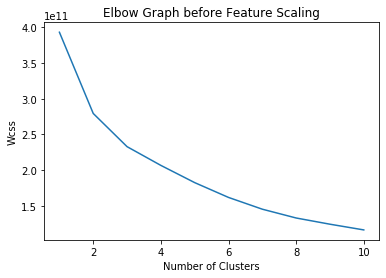

In [10]:
#Finding the K Value in Kmeans(i.e: no. of clusters)
wcss = []  
for i in range(1,11): #checking the number of clusters from 1 to 10
    kmeans = KMeans(n_clusters=i,max_iter=300,random_state=0) # Maximum Iteration=300, random state=0
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph before Feature Scaling')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

## Calculate the silhouette score for the above clustering

In [11]:
nclusters = 3 # this is the k in kmeans (taken the optimal number of clusters from the elbow graph)
km = KMeans(n_clusters=nclusters, random_state=0) 
km.fit(X)
# predict the cluster for each data point 
y_cluster_kmeans = km.predict(X)
from sklearn import metrics
Score_before_Feature_Scaling = metrics.silhouette_score(X, y_cluster_kmeans) # calculating the silhouette_score
Score_before_Feature_Scaling

0.46604142759108724

## Try feature scaling to see if it will improve the Silhouette score

In [12]:
#Feature Scaling

#algorithms which use Euclidean Distance measure are sensitive to Magnitudes.
#Here feature scaling helps to weigh all the features equally.

#Clustering uses Euclidean Distance, so feature scaling helps to weigh all the features equally

from sklearn import preprocessing 
scaler = preprocessing.StandardScaler() 
scaler.fit(X) # Standardizing the features
X_scaled_array = scaler.transform(X) 
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

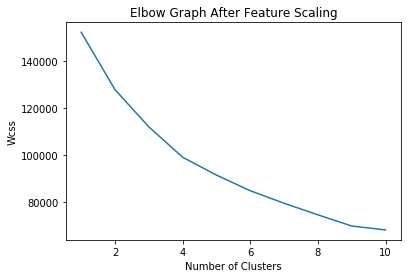

In [13]:
#Finding the K Value in Kmeans(i.e: no. of clusters)
wcss = []  
for i in range(1,11): #checking the number of clusters from 1 to 10
    kmeans = KMeans(n_clusters=i,max_iter=300,random_state=0)# Maximum Iteration=300, random state=0
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph After Feature Scaling')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [14]:
nclusters = 3 # this is the k in kmeans (taken the optimal number of clusters from the elbow graph)
km = KMeans(n_clusters=nclusters, random_state=0) 
km.fit(X_scaled)
# predict the cluster for each data point 
y_cluster_kmeans_scaled = km.predict(X_scaled)
from sklearn import metrics
Score_after_Feature_Scaling = metrics.silhouette_score(X_scaled, y_cluster_kmeans_scaled) # calculating the silhouette_score
Score_after_Feature_Scaling

0.25024795274747624

## Apply PCA

In [15]:
#Principal component analysis (PCA) is a technique for reducing the dimensionality of datasets
from sklearn.decomposition import PCA

In [16]:
#PCA Projection to 2D
#projects the original data which is 17 dimensional into 2 dimensions
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X)
X_pca_df = pd.DataFrame(data=X_pca, columns = ['principal component 1', 'principal component 2'])
X_pca_df

,principal component 1,principal component 2
0,-4326.383956,921.566884
1,4118.916676,-2432.846347
2,1497.907660,-1997.578692
3,1394.548556,-1488.743450
4,-3743.351874,757.342659
...,...,...
8945,-4208.357938,1122.443274
8946,-4123.924001,951.683803
8947,-4379.444202,911.504566
8948,-4791.117744,1032.540944


## Apply kmeans algorithm on the PCA result

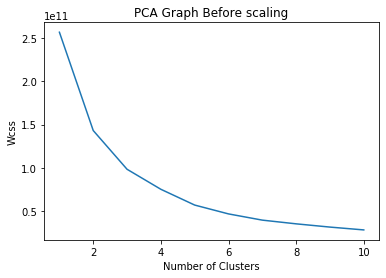

In [17]:
#Finding the K Value in Kmeans(i.e: no. of clusters)
wcss = []  
for i in range(1,11): #checking the number of clusters from 1 to 10
    kmeans = KMeans(n_clusters=i,max_iter=300,random_state=0)# Maximum Iteration=300, random state=0
    kmeans.fit(X_pca_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('PCA Graph Before scaling')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [18]:
nclusters = 3 # this is the k in kmeans (taken the optimal number of clusters from the elbow graph) 
km = KMeans(n_clusters=nclusters, random_state=0) 
km.fit(X_pca_df)
# predict the cluster for each data point 
y_cluster_kmeans_pca = km.predict(X_pca_df)
from sklearn import metrics
Score_PCA = metrics.silhouette_score(X_pca_df, y_cluster_kmeans_pca)# calculating the silhouette_score
Score_PCA

0.5720003152910857

## SCALING+PCA+KMEANS

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Standardizing the features
x_scaler = scaler.fit_transform(X)
x_scaler

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [20]:
#PCA Projection to 2D
# projects the original data which is 17 dimensional into 2 dimensions
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(x_scaler)
X_pca_df_scale = pd.DataFrame(data=X_pca, columns = ['principal component 1', 'principal component 2'])
X_pca_df_scale

,principal component 1,principal component 2
0,-1.682220,-1.076452
1,-1.138292,2.506456
2,0.969673,-0.383499
3,-0.873625,0.043154
4,-1.599435,-0.688576
...,...,...
8945,-0.359630,-2.016137
8946,-0.564369,-1.639119
8947,-0.926204,-1.810778
8948,-2.336549,-0.657964


## Apply kmeans algorithm on the Scaling+PCA result

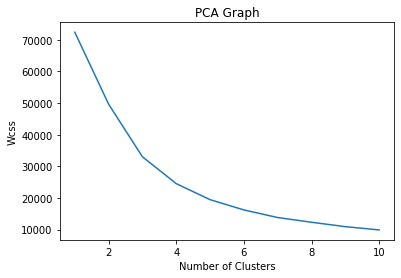

In [21]:
#Finding the K Value in Kmeans(i.e: no. of clusters)
wcss = []  
for i in range(1,11):#checking the number of clusters from 1 to 10
    kmeans = KMeans(n_clusters=i,max_iter=300,random_state=0)# Maximum Iteration=300, random state=0
    kmeans.fit(X_pca_df_scale)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('PCA Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [22]:
nclusters = 3 # this is the k in kmeans (taken the optimal number of clusters from the elbow graph) 
km = KMeans(n_clusters=nclusters, random_state=0) 
km.fit(X_pca_df_scale)
# predict the cluster for each data point 
y_cluster_kmeans_scale = km.predict(X_pca_df_scale)
from sklearn import metrics
Score_PCA_Scaled = metrics.silhouette_score(X_pca_df_scale, y_cluster_kmeans_scale)# calculating the silhouette_score
Score_PCA_Scaled

0.4523241990438979

## Observations of the score

In [23]:
print("Silhouette Score before scaling is:",Score_before_Feature_Scaling)
print("Silhouette Score after scaling is:",Score_after_Feature_Scaling)
print("Silhouette Score with PCA+Kmeans:", Score_PCA)
print("Silhouette Score with Scaling+PCA+KMeans:", Score_PCA_Scaled)

Silhouette Score before scaling is: 0.46604142759108724
Silhouette Score after scaling is: 0.25024795274747624
Silhouette Score with PCA+Kmeans: 0.5720003152910857
Silhouette Score with Scaling+PCA+KMeans: 0.4523241990438979


## Visualize the clustering for PCA+KMEANS , SCALING+PCA+KMEANS

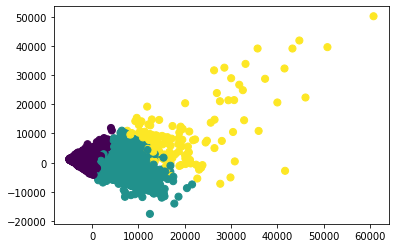

In [24]:
#Scatter plot for PCA+KMEANS 
plt.scatter(X_pca_df.iloc[:,0],X_pca_df.iloc[:,1],c=y_cluster_kmeans,s=50,cmap='viridis');

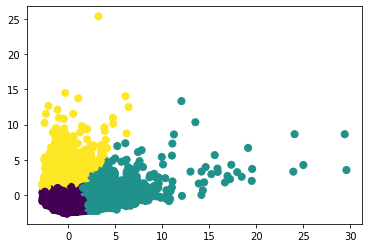

In [25]:
#Scatter plot for SCALING+PCA+KMEANS 
plt.scatter(X_pca_df_scale.iloc[:,0],X_pca_df_scale.iloc[:,1],c=y_cluster_kmeans_scale,s=50,cmap='viridis');